# Electric Vehicle Market Segmentation Analysis

In [105]:
# importing all the required in-built libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [106]:
# Loading dataset

df_Org = pd.read_csv(r"C:\Users\Manoj\Desktop\FynnL\Indian automoble buying behavour study 1.0.csv")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = df_Org.copy()

df.head()

df.columns

df.shape

df.head()

df['Make'].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

# Data Preprocessing

In [107]:
# Data preprocessing

df.isnull().sum()

df.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [108]:
df['Age'].unique()

array([27, 35, 45, 41, 31, 28, 33, 34, 29, 30, 49, 26, 37, 36, 43, 42, 32,
       44, 39, 46, 50, 51], dtype=int64)

In [109]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000,99.000,99.000,99.000,99.000,99.000
mean,36.313,2.182,1736363.636,534343.434,2270707.071,1194040.404
std,6.246,1.335,673621.729,605444.956,1050777.411,437695.540
min,26.000,0.000,200000.000,0.000,200000.000,110000.000
25%,31.000,2.000,1300000.000,0.000,1550000.000,800000.000
50%,36.000,2.000,1600000.000,500000.000,2100000.000,1200000.000
75%,41.000,3.000,2200000.000,900000.000,2700000.000,1500000.000
max,51.000,4.000,3800000.000,2100000.000,5200000.000,3000000.000


# Data Visualization

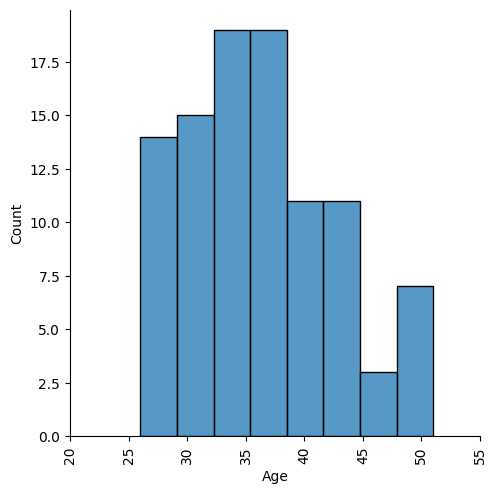

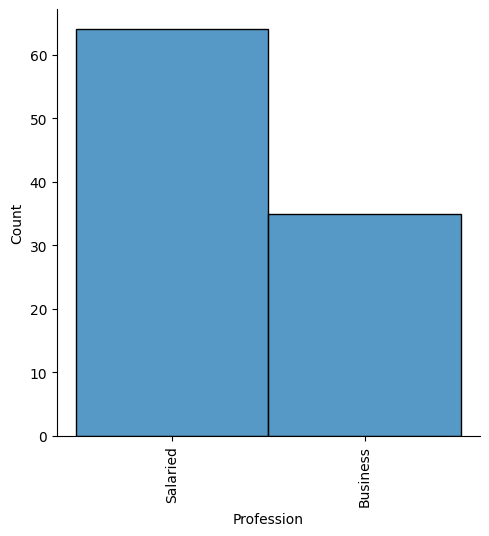

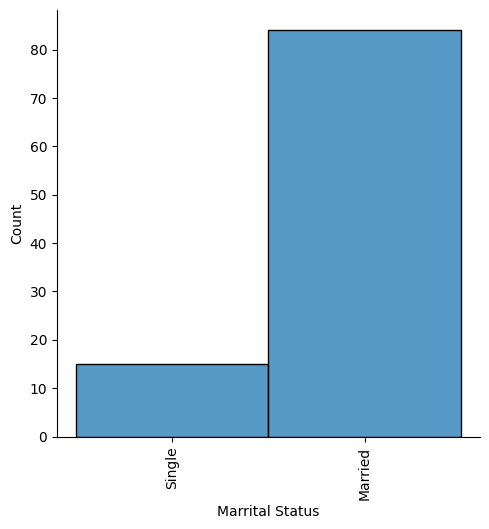

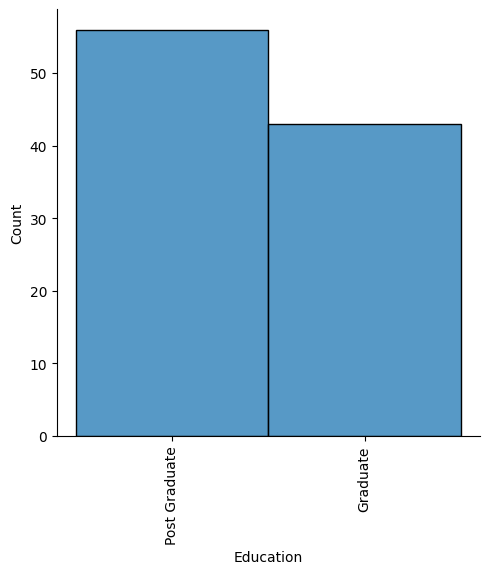

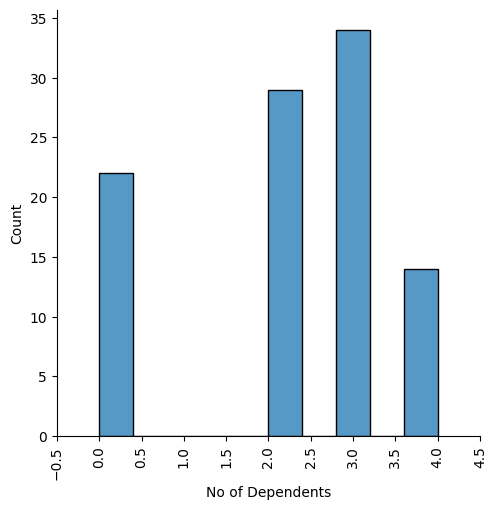

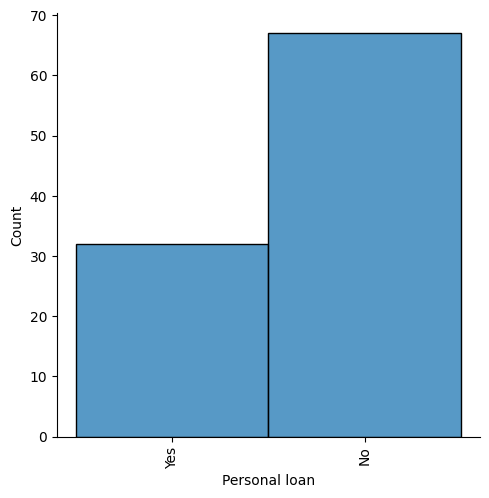

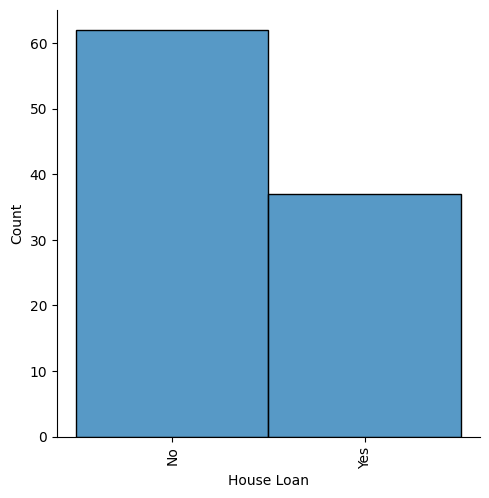

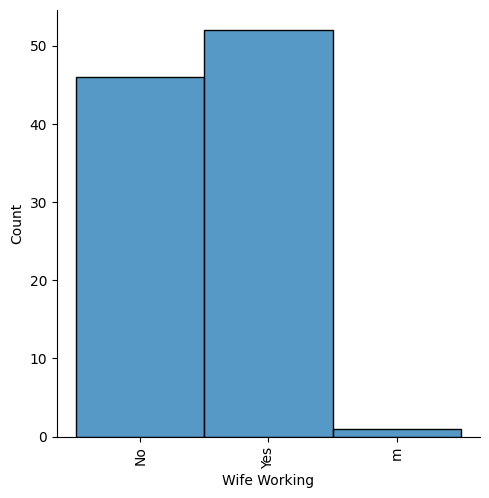

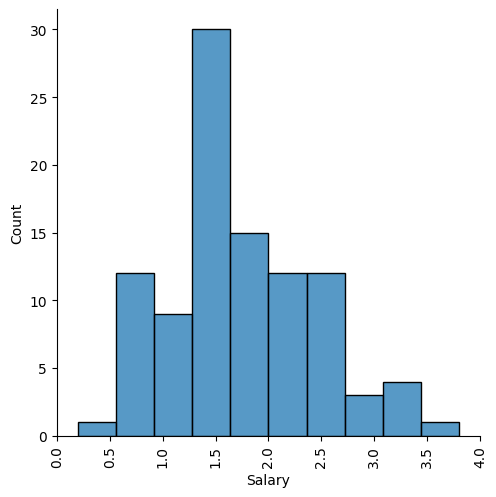

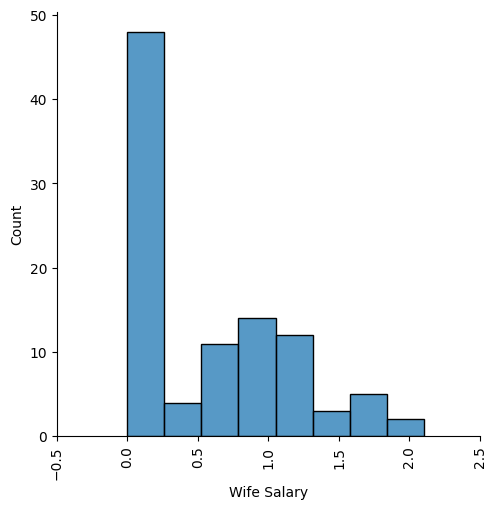

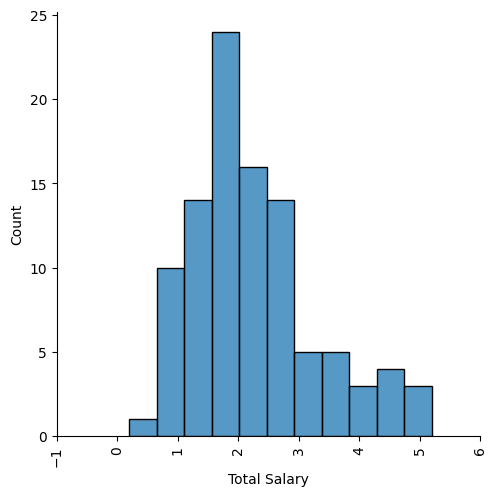

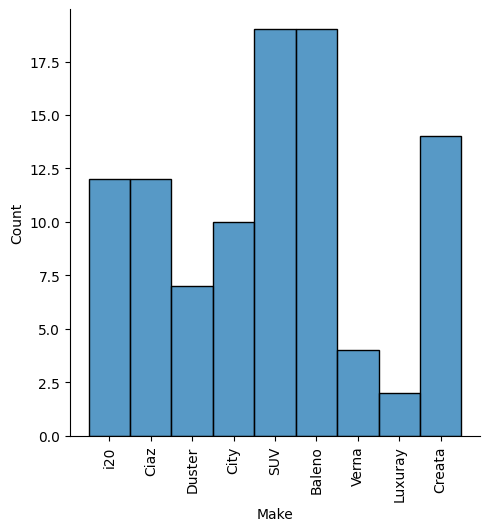

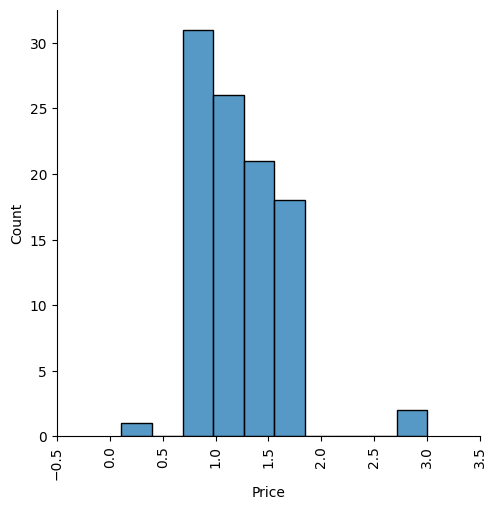

In [110]:
# Data Visualization (type, power, region)

for col in df.columns:
    ax= sns.displot(df[col])
    ax.set_xticklabels(rotation=90)  

<Axes: xlabel='Marrital Status', ylabel='count'>

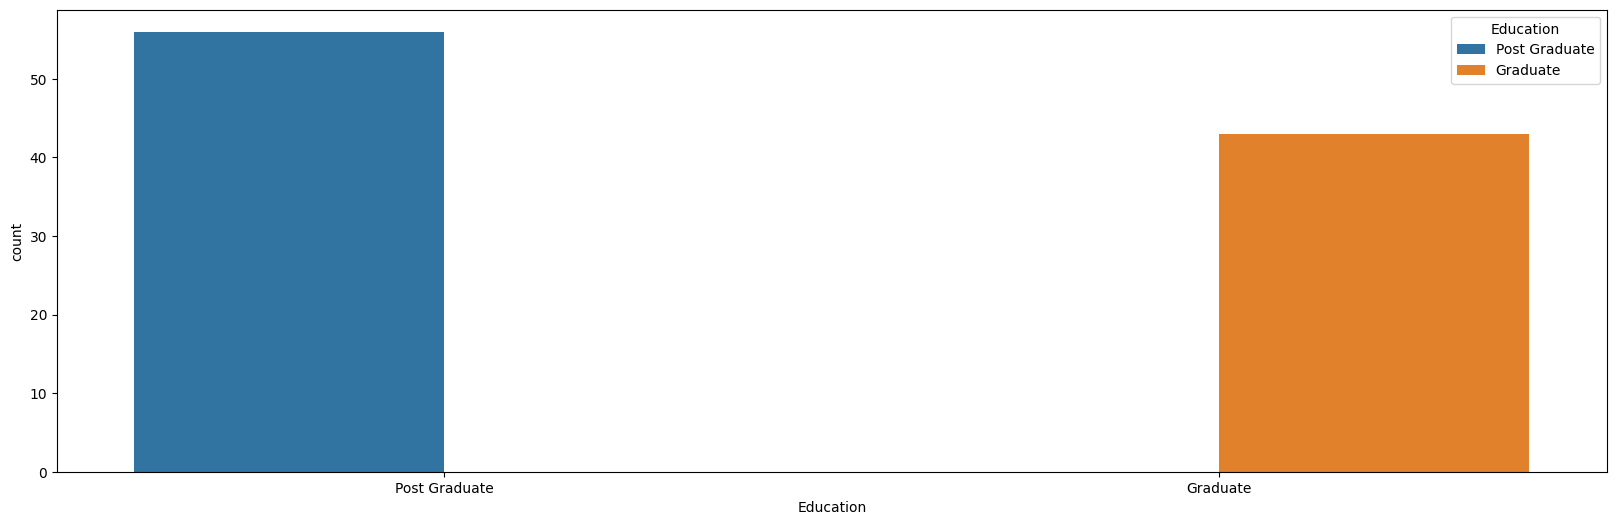

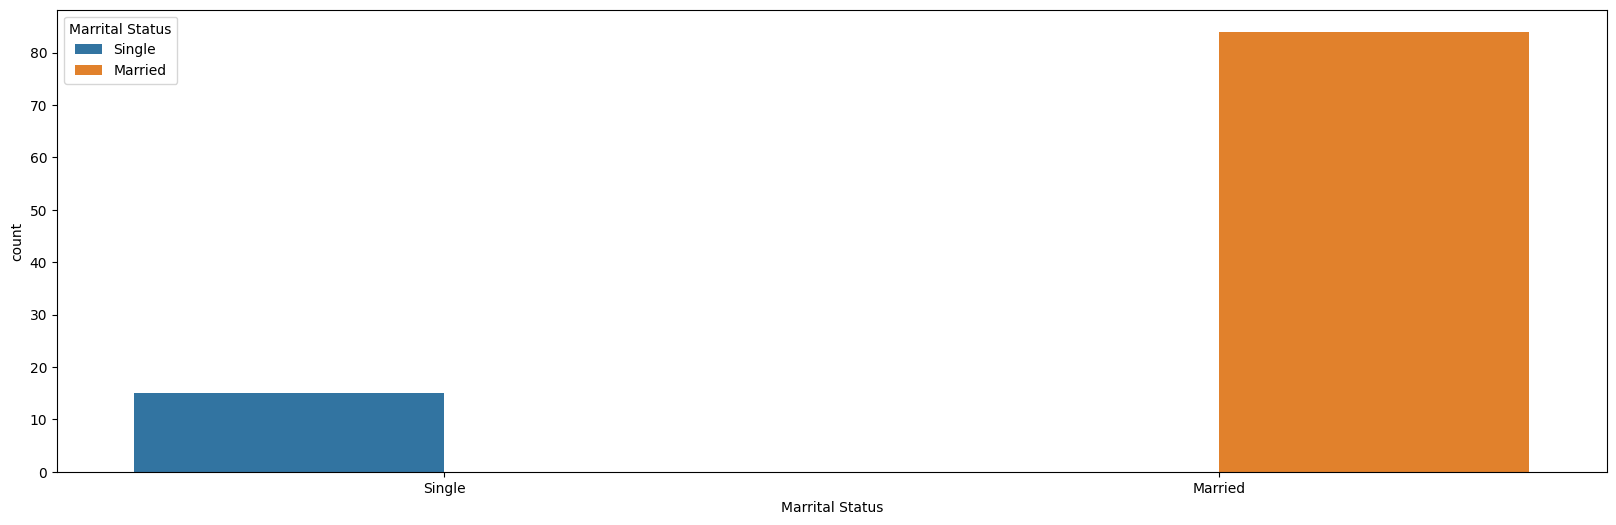

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(x="Education", data=df, hue="Education")

plt.figure(figsize=(20,6))
sns.countplot(x="Marrital Status", data=df, hue="Marrital Status")

<Axes: xlabel='Age', ylabel='count'>

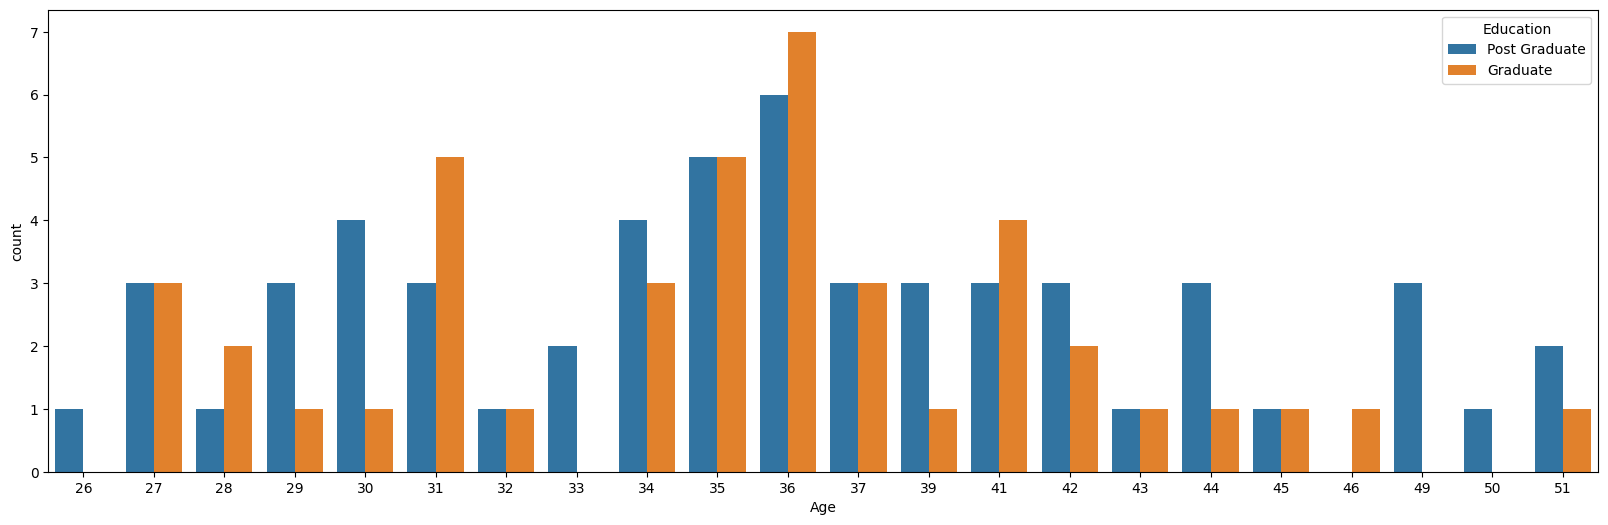

In [73]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=df, hue="Education")

C:\Users\Manoj\AppData\Local\Temp\ipykernel_8380\3903709160.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

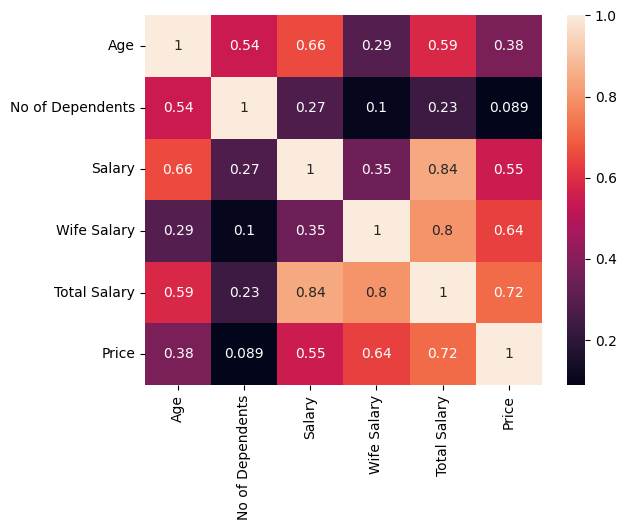

In [74]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

In [75]:

def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))


In [76]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [77]:
df['Profession']= label_encode(df,'Profession')
df['Marrital Status']= label_encode(df,'Marrital Status')
df['Education']= label_encode(df,'Education')
df['Personal loan']= label_encode(df,'Personal loan')
df['House Loan']= label_encode(df,'House Loan')
df['Wife Working']= label_encode(df,'Wife Working')
df['Make']= label_encode(df,'Make')

In [78]:
df.head()

X = df.iloc[::-1]

# K Means Model

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

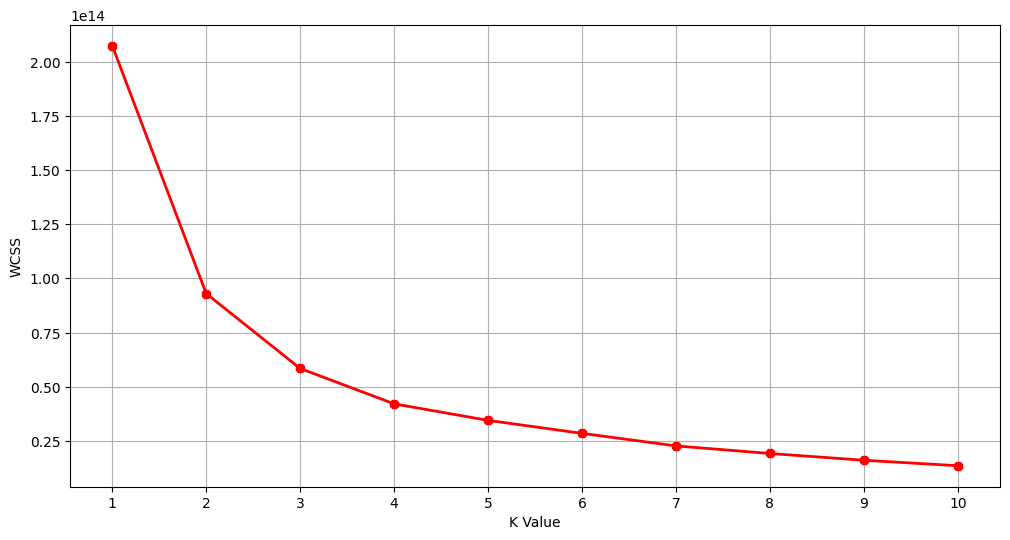

In [79]:
# K-Means Model

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

C:\Users\Manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


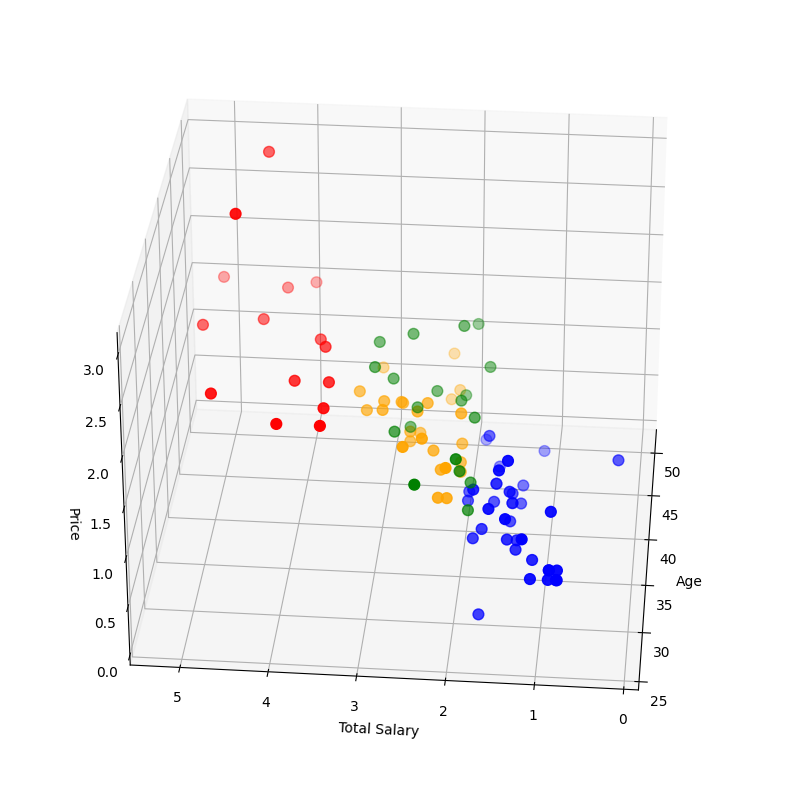

In [80]:
km = KMeans(n_clusters=4, random_state=28)
clusters = km.fit_predict(df)
df["Cluster"] = clusters

df_Org["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Total Salary"][df.Cluster == 0], df["Price"][df.Cluster == 0], c='blue', s=60)
ax.scatter(df.Age[df.Cluster == 1], df["Total Salary"][df.Cluster == 1], df["Price"][df.Cluster == 1], c='red', s=60)
ax.scatter(df.Age[df.Cluster == 2], df["Total Salary"][df.Cluster == 2], df["Price"][df.Cluster == 2], c='green', s=60)
ax.scatter(df.Age[df.Cluster == 3], df["Total Salary"][df.Cluster == 3], df["Price"][df.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('Price')
plt.show()

In [82]:
df1=df_Org.copy()
df1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,0
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,3
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,3
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,2
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,1
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,2
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,1


In [83]:
df1['Cluster'].value_counts() 

0    38
3    26
2    20
1    15
Name: Cluster, dtype: int64

More customers belongs to 0, 2 and 3

very less are belongs to 1

In [84]:
Cluster_0 = df1[df1.Cluster==0]
Cluster_1 = df1[df1.Cluster==1]
Cluster_2 = df1[df1.Cluster==2]
Cluster_3 = df1[df1.Cluster==3]
Cluster_2.shape

(20, 14)

In [85]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3), 
 Cluster_3['Age'].value_counts().head(3)]

[27    5
 35    5
 31    4
 Name: Age, dtype: int64,
 49    2
 34    2
 44    2
 Name: Age, dtype: int64,
 42    3
 34    2
 44    2
 Name: Age, dtype: int64,
 36    7
 35    5
 41    3
 Name: Age, dtype: int64]

Based on Cluster 0, 2 and 3 Age groups of 27-44 are targeted

In [86]:
[Cluster_0['Profession'].value_counts().head(), 
 Cluster_1['Profession'].value_counts().head(), 
 Cluster_2['Profession'].value_counts().head(),  
 Cluster_3['Profession'].value_counts().head()]

[Salaried    21
 Business    17
 Name: Profession, dtype: int64,
 Salaried    12
 Business     3
 Name: Profession, dtype: int64,
 Salaried    12
 Business     8
 Name: Profession, dtype: int64,
 Salaried    19
 Business     7
 Name: Profession, dtype: int64]

Salaried people are more interested on electric vehicles

In [88]:
[Cluster_0['Total Salary'].mean(), 
 Cluster_1['Total Salary'].mean(), 
 Cluster_2['Total Salary'].mean(), 
 Cluster_3['Total Salary'].mean()] 

[1339473.6842105263, 4240000.0, 2340000.0, 2442307.6923076925]

Cluster 1 has highest average salary (42,40,000)

In [89]:
[Cluster_0['Marrital Status'].value_counts().head(), 
 Cluster_1['Marrital Status'].value_counts().head(), 
 Cluster_2['Marrital Status'].value_counts().head(), 
 Cluster_3['Marrital Status'].value_counts().head()]

[Married    25
 Single     13
 Name: Marrital Status, dtype: int64,
 Married    15
 Name: Marrital Status, dtype: int64,
 Married    18
 Single      2
 Name: Marrital Status, dtype: int64,
 Married    26
 Name: Marrital Status, dtype: int64]

Married people are supposed to be targeted

In [90]:
[Cluster_0['No of Dependents'].value_counts().head(), 
 Cluster_1['No of Dependents'].value_counts().head(), 
 Cluster_2['No of Dependents'].value_counts().head(), 
 Cluster_3['No of Dependents'].value_counts().head()]

[0    15
 3    11
 4     6
 2     6
 Name: No of Dependents, dtype: int64,
 2    8
 3    6
 4    1
 Name: No of Dependents, dtype: int64,
 3    7
 2    6
 4    5
 0    2
 Name: No of Dependents, dtype: int64,
 3    10
 2     9
 0     5
 4     2
 Name: No of Dependents, dtype: int64]

Family with 3 to 4 members are more interested in EV

In [91]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(), 
 Cluster_2['Education'].value_counts().head(), 
 Cluster_3['Education'].value_counts().head()]

[Post Graduate    21
 Graduate         17
 Name: Education, dtype: int64,
 Post Graduate    10
 Graduate          5
 Name: Education, dtype: int64,
 Post Graduate    11
 Graduate          9
 Name: Education, dtype: int64,
 Post Graduate    14
 Graduate         12
 Name: Education, dtype: int64]

Graduates and post graduates both are interested in EV almost equally

In [94]:
[Cluster_0['Price'].value_counts().head(),
 Cluster_1['Price'].value_counts().head(), 
 Cluster_2['Price'].value_counts().head(), 
 Cluster_3['Price'].value_counts().head()] 

[700000     17
 800000     10
 1200000     5
 1100000     3
 110000      1
 Name: Price, dtype: int64,
 1500000    7
 1600000    6
 3000000    2
 Name: Price, dtype: int64,
 1100000    6
 1200000    3
 1500000    3
 800000     3
 1300000    2
 Name: Price, dtype: int64,
 1600000    9
 1200000    5
 1500000    5
 1100000    3
 1300000    3
 Name: Price, dtype: int64]

Cluster 0, 2, and 3 have more number of customers (91)

Based on cluster 0, 2, and 3

37% of people spend upto 10 lacks on EV

43% of people spend upto 15 lacks on EV

only 11% of people spend more than 15 lacks on EV


Based on this we can conclude that most of the customers ready to spend upto 15 lacks on EV

In [95]:
Active_EV = pd.read_csv(r"C:\Users\soora\Downloads\EV_India.csv")
Active_EV.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Andra Pradesh,NaN,NaN,NaN
2,3,Arunachal Pradesh,20,"2,52,965","2,52,985"
3,4,Assam,64766,"46,77,053","47,41,819"
4,5,Bihar,83335,"1,04,07,078","1,04,90,413"


In [96]:
c = ['Total Electric Vehicle','Total Non-Electric Vehicle','Total']
le= LabelEncoder()
for i in c:
    Active_EV[i]=le.fit_transform(Active_EV[i].astype(str))

In [97]:
Active_EV.isnull().sum()


Sr. No.                       0
State Name                    0
Total Electric Vehicle        0
Total Non-Electric Vehicle    0
Total                         0
dtype: int64

# Visualization

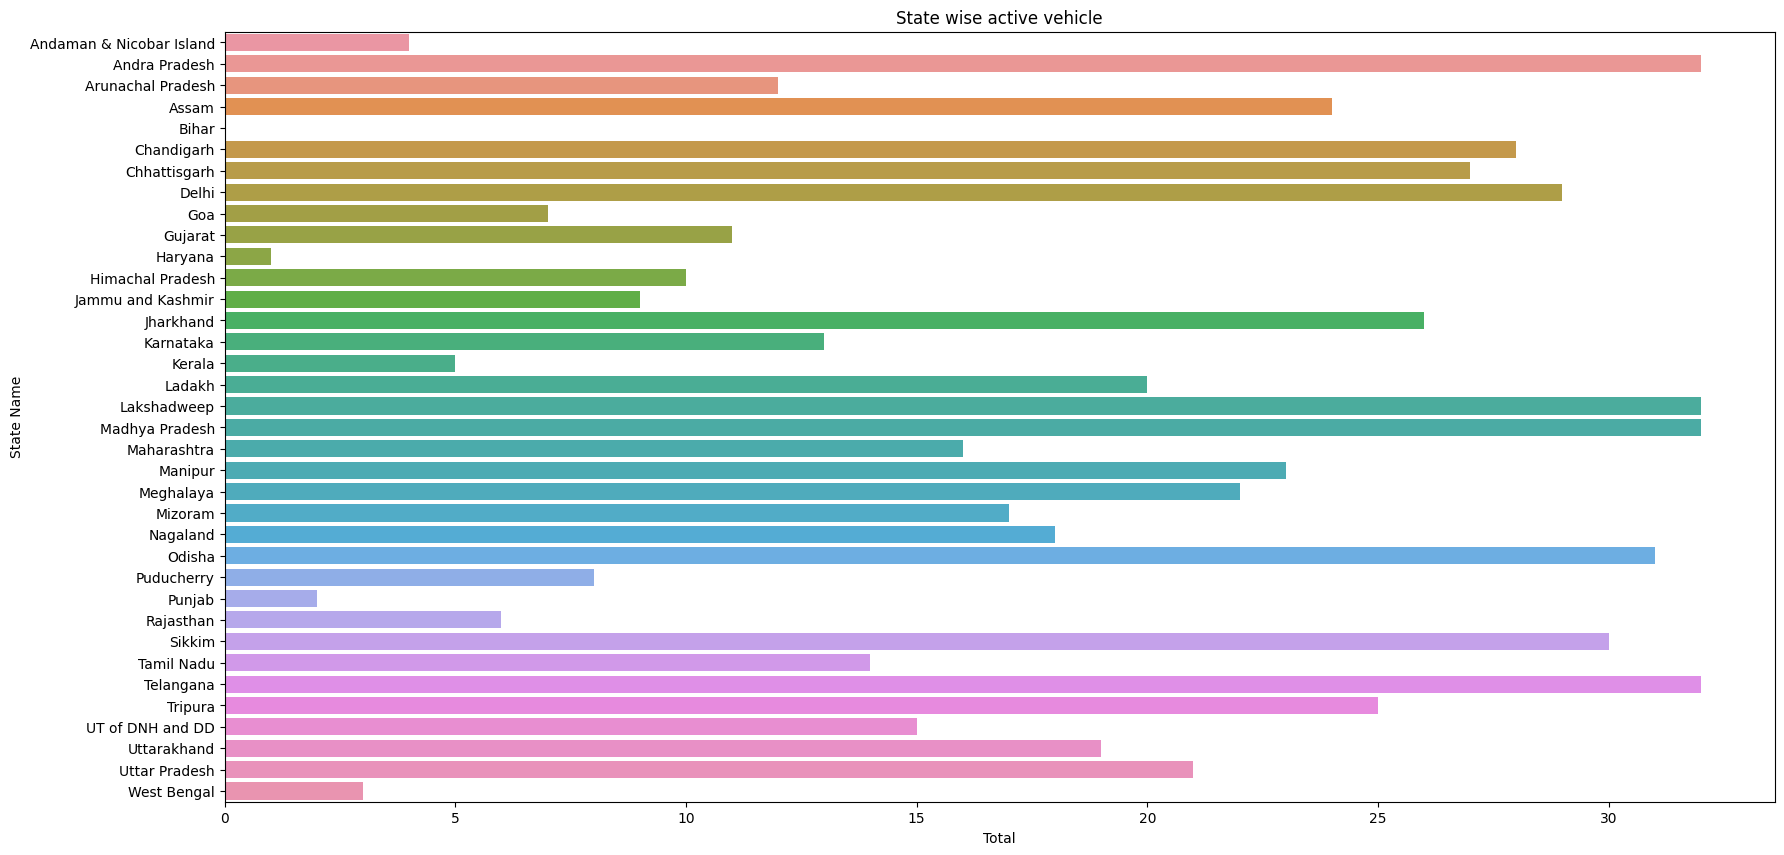

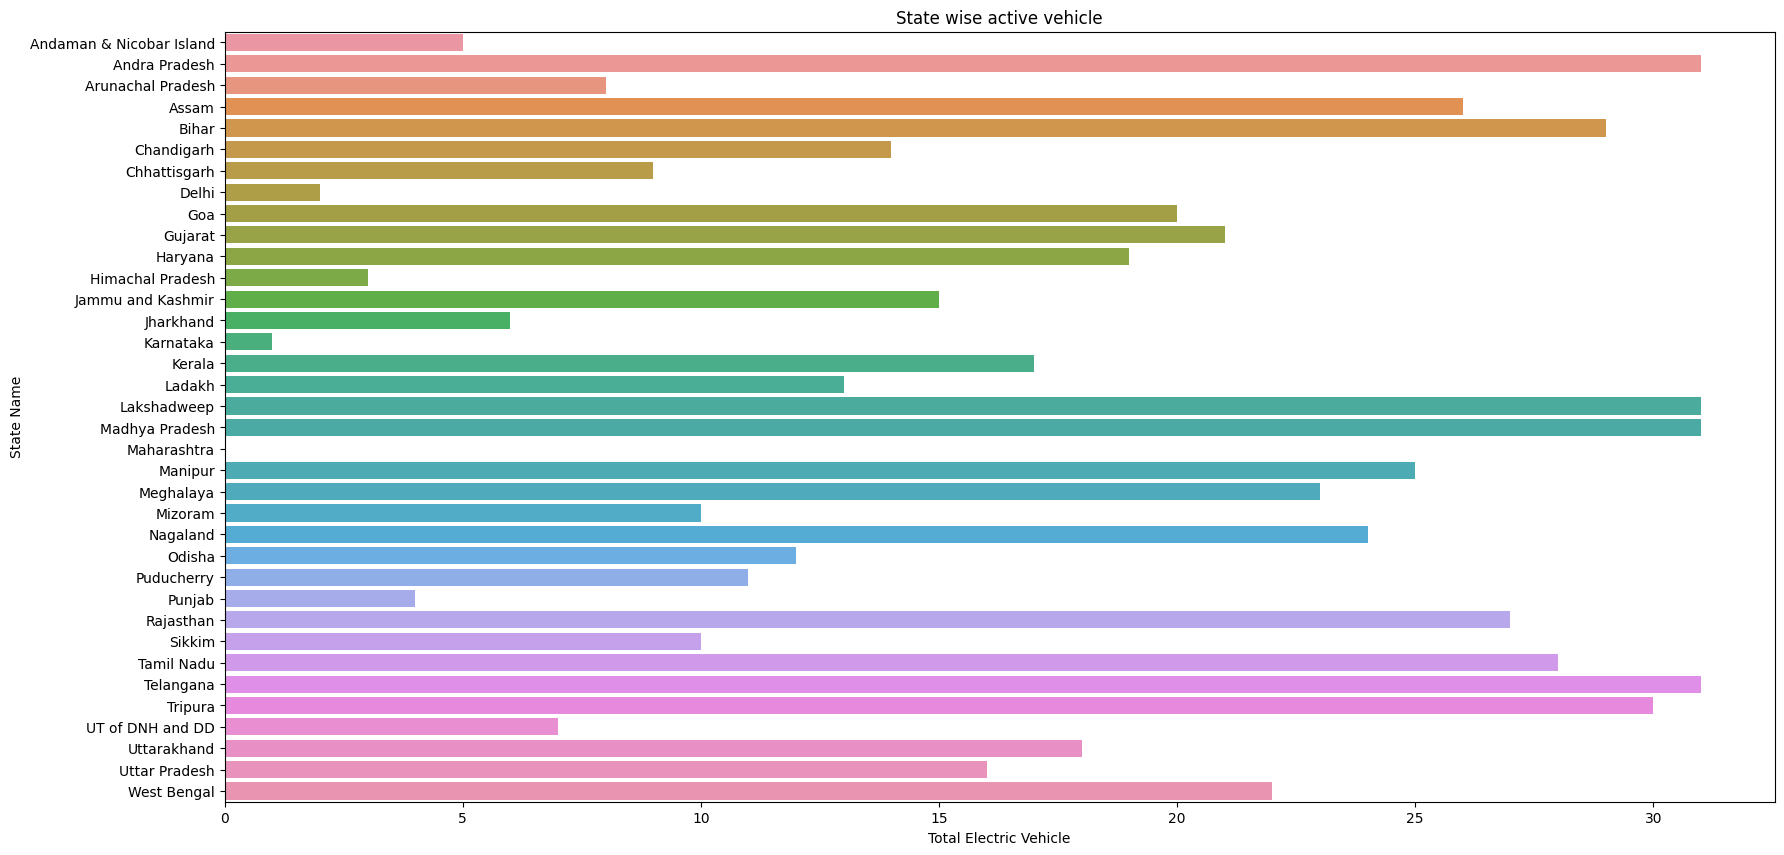

In [99]:
plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EV['State Name'], x=Active_EV['Total'])
plt.title('State wise active vehicle')
plt.show()


plt.rcParams['figure.figsize'] = (20, 10)
f = sns.barplot(y=Active_EV['State Name'], x=Active_EV['Total Electric Vehicle'])
plt.title('State wise active vehicle')
plt.show()

Text(0.5, 1.0, 'Total Active Vehecles Vs Total active EVs')

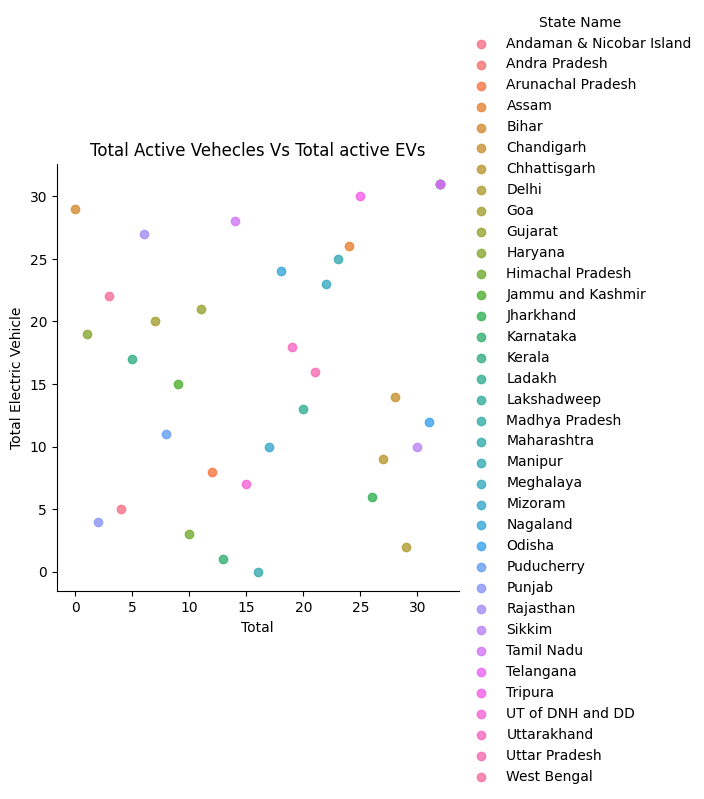

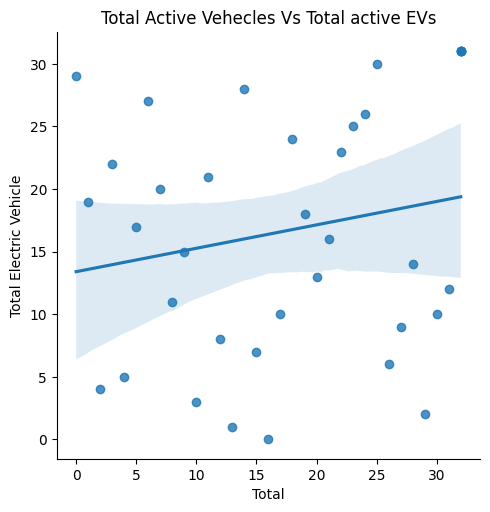

In [100]:
sns.lmplot(data=Active_EV, y="Total Electric Vehicle", x="Total", hue='State Name')
plt.title('Total Active Vehecles Vs Total active EVs')

sns.lmplot(data=Active_EV, y="Total Electric Vehicle", x="Total")
plt.title('Total Active Vehecles Vs Total active EVs')

By the display we can conclude that these 

states Andhra Pradesh, Assam, Bihar, Goa, Gujarat, Kerala, Lakshadweep, Madhya Pradesh, Manipur, Rajastan, TamilNadu Tripura, Telangana, West Bengal are already using EV in huge quantity


# Conclusion

# Demographic Segments :
    
    Age       target : 27 to 44 years
        
    Income    target : 1.3 lacks to 2.5 lacks
        
    Education target : Post graduation
        
        


# Geographic Segments :
    
    Location : Andhra Pradesh, Assam, Bihar, Goa, Gujarat, Kerala, Lakshadweep, Madhya Pradesh, Manipur, Rajastan, TamilNadu Tripura, Telangana, West Bengal
        
        *** Note : HighWay charging stations analysis also suggested
            


# Psychographic Segments :
    
    Family - Status : Married and family members from 2 to 4